# YOLO-Modelle – Übersicht

YOLO-Modelle können für eine ganze Reihe von Aufgaben trainiert werden. Konkret gibt es
fünf verschiedene Versionen eines YOLO-Modells, die je nach Anwendungsfall genutzt werden
können. Zum Beispiel kann man für die 11. Version der YOLO-Modelle, YOLO11, folgende
Modelle laden:

- YOLO("yolo11n.pt"): Standardmodell, Objekterkennung (mit Begrenzungsrahmen / Bounding Boxes)
- YOLO("yolo11n-cls.pt"): Klassifikationsmodell (ohne Bounding Boxes, liefert nur die Klassenbezeichnung)
- YOLO("yolo11n-seg.pt"): Segmentierungsmodell (liefert Masken der erkannten Segmente)
- YOLO("yolo11n-pose.pt"): Pose-Schätzmodell (liefert Gelenkpositionen von menschlichen Subjekten)
- YOLO("yolo11n-obb.pt"): Oriented Bounding Box (OBB) Modell (liefert Erkennungen mit geneigten Begrenzungsrahmen)

Schauen wir uns an, welche Ergebnisse diese verschiedenen Modelle liefern!

## Das Standardmodell: Objekterkennung

Hier ist ein Beispiel für die Nutzung des Objekterkennungsmodells von YOLO11.
Wie zuvor öffnen wir das Video, extrahieren einen Frame und führen dann das Modell aus.

In [2]:
# for running in Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import cv2

video_path = "/content/drive/MyDrive/AICamp-Share/Example02/data/guenther_neukirchner_cut.mp4"
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    raise ValueError(f"Cannot open video {video_path}")

for i in range(25):
    ret, frame = cap.read()
    if not ret:
        break
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.4 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

0: 352x640 2 persons, 305.3ms
Speed: 15.9ms preprocess, 305.3ms inference, 38.8ms postprocess per image at shape (1, 3, 352, 640)


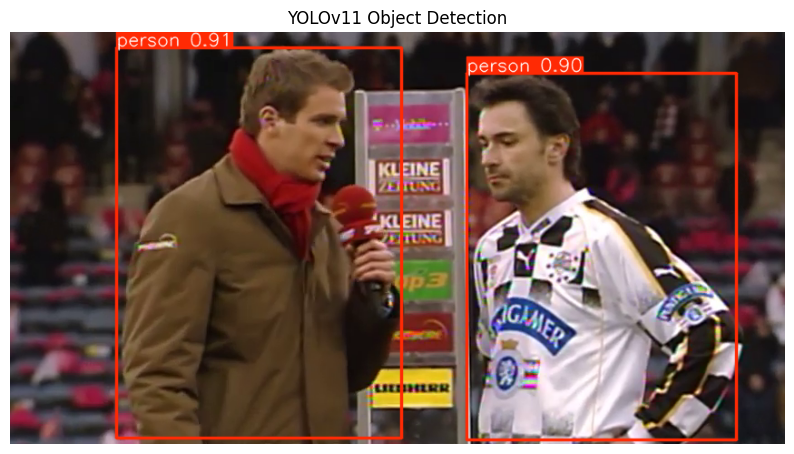

In [5]:
!pip install ultralytics
from ultralytics import YOLO
import matplotlib.pyplot as plt

model_detect = YOLO("yolo11n.pt")           # Object detection model
result = model_detect(frame_rgb)

fig, ax = plt.subplots(figsize=(10, 6))
annotated_frame = result[0].plot()  # returns image with boxes drawn
ax.imshow(annotated_frame)
ax.axis('off')
ax.set_title("YOLOv11 Object Detection")
plt.show()

## Bildklassifikation

Wir wissen nun, wie Objekterkennung funktioniert; schauen wir uns jetzt die Klassifikation an.


0: 224x224 bulletproof_vest 0.17, sweatshirt 0.06, Windsor_tie 0.06, lab_coat 0.06, whistle 0.06, 14.6ms
Speed: 5.9ms preprocess, 14.6ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


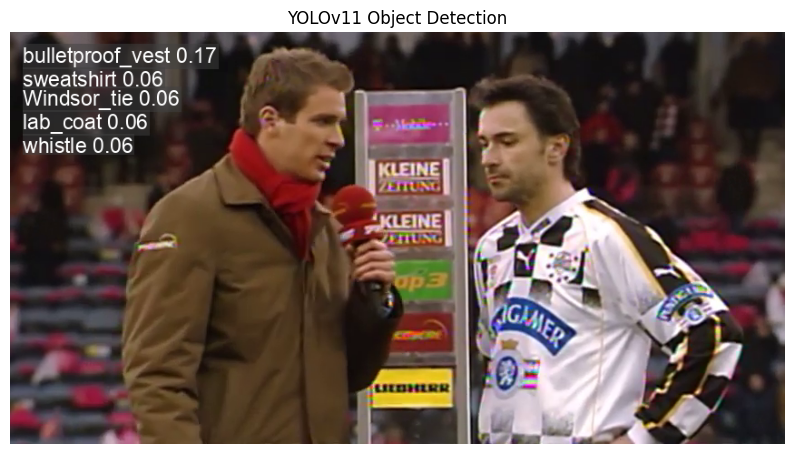

In [6]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

model_class = YOLO("yolo11n-cls.pt")           # Classification model
result = model_class(frame_rgb)

fig, ax = plt.subplots(figsize=(10, 6))
annotated_frame = result[0].plot()  # returns image with boxes drawn
ax.imshow(annotated_frame)
ax.axis('off')
ax.set_title("YOLOv11 Object Detection")
plt.show()

Das YOLO11-Klassifikationsmodell wurde auf dem ImageNet
-Datensatz trainiert, der keine Klassen für Personen oder Menschen enthält – dementsprechend werden unsere Personen hier nicht erkannt.
Der Datensatz enthält jedoch eine große Anzahl an Tieren. Wenn wir es erneut mit einem anderen Video mit Flamingos prüfen…

In [7]:
import cv2

video_path = "/content/drive/MyDrive/AICamp-Share/Example02/data/flamingo.mp4"
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    raise ValueError(f"Cannot open video {video_path}")

for i in range(25):
    ret, frame = cap.read()
    if not ret:
        break
    frame_rgb_flamingo = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)


0: 224x224 American_egret 0.34, flamingo 0.34, little_blue_heron 0.13, goose 0.11, drake 0.02, 14.5ms
Speed: 8.9ms preprocess, 14.5ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)


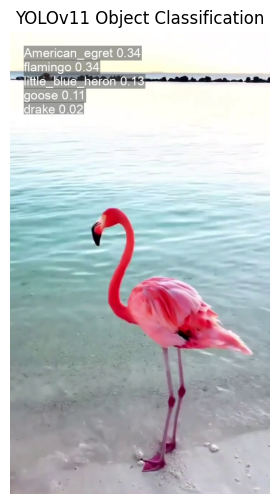

In [8]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

model_class = YOLO("yolo11n-cls.pt")           # Classification model
result = model_class(frame_rgb_flamingo)

fig, ax = plt.subplots(figsize=(10, 6))
annotated_frame = result[0].plot()  # returns image with boxes drawn
ax.imshow(annotated_frame)
ax.axis('off')
ax.set_title("YOLOv11 Object Classification")
plt.show()

Das funktioniert besser, weil es im Datensatz Klassen gibt, die zu unserem Video passen.
Wir erhalten eine Genauigkeit von 34 %, dass das Objekt tatsächlich ein Flamingo ist,
aber ebenso viel Wahrscheinlichkeit, dass es ein Amerikanischer Silberreiher („American
Egret“) ist.

## Bildsegmentierung

Als Nächstes probieren wir die Bildsegmentierung aus.


0: 352x640 3 persons, 192.2ms
Speed: 2.2ms preprocess, 192.2ms inference, 17.4ms postprocess per image at shape (1, 3, 352, 640)


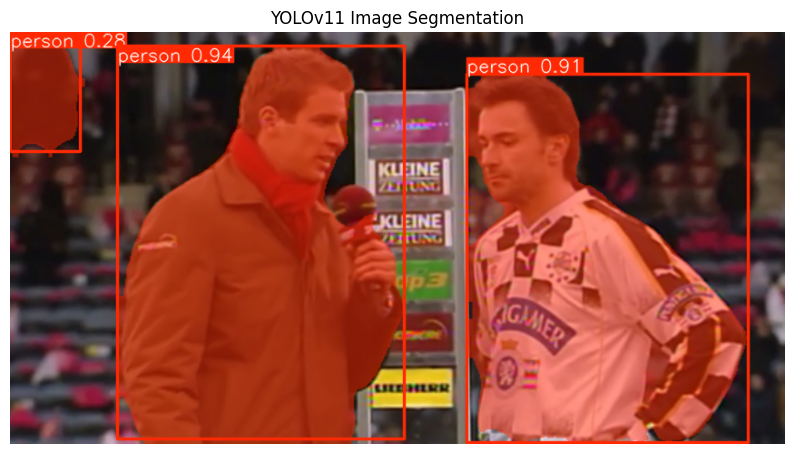

In [9]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

model_segment = YOLO("yolo11n-seg.pt")            # Segmentation model
result = model_segment(frame_rgb)

fig, ax = plt.subplots(figsize=(10, 6))
annotated_frame = result[0].plot()  # returns image with boxes drawn
ax.imshow(annotated_frame)
ax.axis('off')
ax.set_title("YOLOv11 Image Segmentation")
plt.show()

Hier erhalten wir nicht nur die Begrenzungsrahmen (Bounding Boxes), Klassen und
Wahrscheinlichkeiten für die jeweiligen Objekte, sondern auch eine Maske von Pixeln, die
uns genau zeigt, wo sich die Instanzen unserer Klasse im Bild befinden!

## Pose estimation

Als Nächstes: post estimation. Damit versuchen wir, die Positionen von 17 wichtigen
"Landmarks" der menschlichen Anatomie zu finden (Nase, Augen, Ohren,
Schultern, Ellbogen, Handgelenke, Hüften, Knie, Sprunggelenke).


0: 352x640 2 persons, 134.6ms
Speed: 3.1ms preprocess, 134.6ms inference, 0.9ms postprocess per image at shape (1, 3, 352, 640)


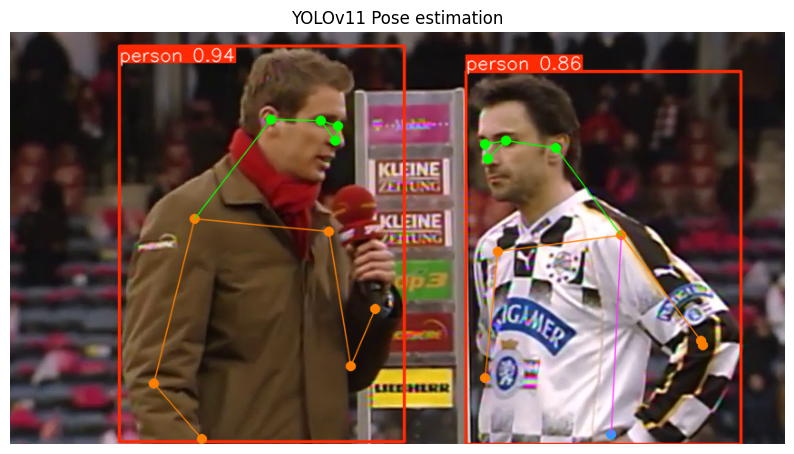

In [10]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

model_pose = YOLO("yolo11n-pose.pt")    # Pose estimation model
result = model_pose(frame_rgb)

fig, ax = plt.subplots(figsize=(10, 6))
annotated_frame = result[0].plot()  # returns image with boxes drawn
ax.imshow(annotated_frame)
ax.axis('off')
ax.set_title("YOLOv11 Pose estimation")
plt.show()

## Geneigte Begrenzungsrahmen (Oriented Bounding Boxes)

Zuletzt, aber nicht weniger wichtig, das Modell für geneigte Begrenzungsrahmen.
Dieses Modell funktioniert im Grunde wie das Objekterkennungsmodell: Wir erkennen
Begrenzungsrahmen für Objekte in unserem Frame. Allerdings erlaubt dieser Ansatz
geneigte Begrenzungsrahmen. Schauen wir uns das an.


0: 544x1024 1 ship, 1 swimming pool, 233.6ms
Speed: 8.3ms preprocess, 233.6ms inference, 11.1ms postprocess per image at shape (1, 3, 544, 1024)


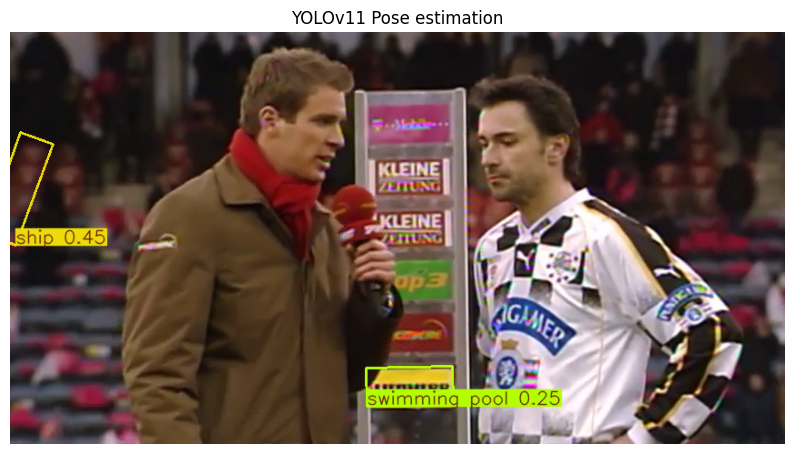

In [11]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

model_obb = YOLO("yolo11n-obb.pt")    # Oriented bounding boxes model
result = model_obb(frame_rgb)

fig, ax = plt.subplots(figsize=(10, 6))
annotated_frame = result[0].plot()  # returns image with boxes drawn
ax.imshow(annotated_frame)
ax.axis('off')
ax.set_title("YOLOv11 Pose estimation")
plt.show()

Auweh! Das hat nicht so gut funktioniert; der Grund dafür ist, dass das Modell auf dem
[DOTAv-Dataset](https://github.com/ultralytics/ultralytics/blob/main/ultralytics/cfg/datasets/DOTAv1.yaml) 
vortrainiert ist, mit den Klassen Flugzeug, Schiff, Lagertank, Baseballfeld, Tennisplatz,
Basketballfeld, Sportplatz, Hafen, Brücke, großes Fahrzeug, kleines Fahrzeug,
Hubschrauber, Kreisverkehr, Fußballfeld, Schwimmbecken.

Die Klassen wirken zunächst etwas ungewöhnlich, aber da geneigte Begrenzungsrahmen ein
großes Thema im Verkehr und bei Satellitendaten sind, ergeben die Klassennamen durchaus
Sinn.

Sehen wir uns z.B. eine Aufnahme eines Hafens in Vogelperspektive an:


0: 640x1024 19 ships, 226.3ms
Speed: 5.7ms preprocess, 226.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 1024)


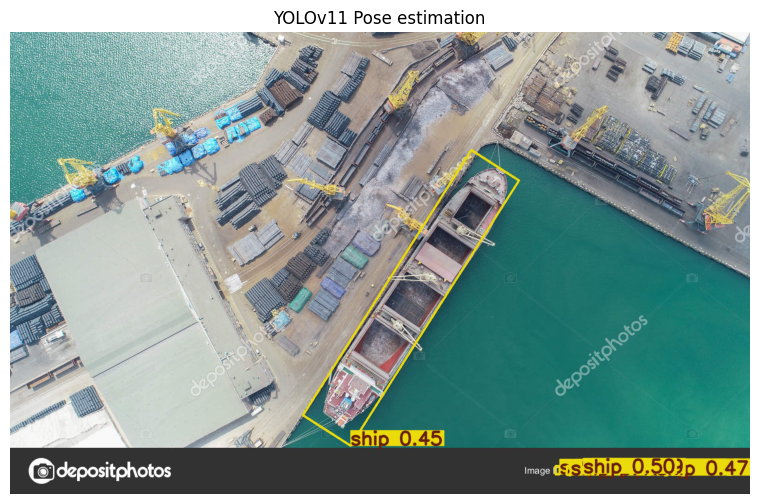

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

model_obb = YOLO("yolo11n-obb.pt")    # Oriented bounding boxes model
img_path = "/content/drive/MyDrive/AICamp-Share/Example02/data/harbor-bev.png"
img_bgr = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
result = model_obb(img_rgb)

fig, ax = plt.subplots(figsize=(10, 6))
annotated_frame = result[0].plot()  # returns image with boxes drawn
ax.imshow(annotated_frame)
ax.axis('off')
ax.set_title("YOLOv11 Pose estimation")
plt.show()

Hier funktioniert das Modell perfekt!